# Librerias

In [1]:
!pip install yfinance --upgrade --no-cache-dir

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Primer acercamiento
Regresion lineal a partir de sklearn.linear_model para acciones individuales

In [ ]:
ticker = "AAPL"
#ticker = "IBM"
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")

#print(data.head())

[*********************100%***********************]  1 of 1 completed


In [ ]:
#print(data.isnull().sum())

data['Daily Return'] = data['Close'].pct_change()

# Display summary statistics
#print(data.describe())

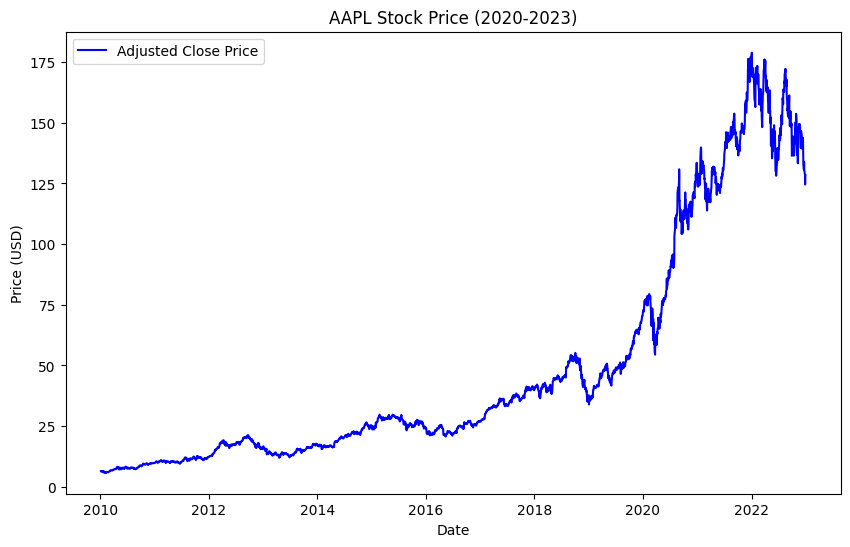

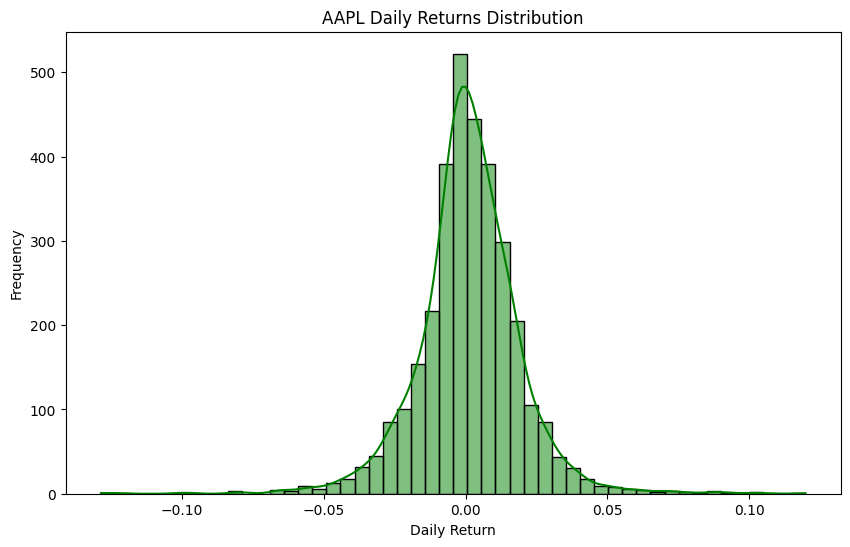

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Adjusted Close Price', color='blue')
plt.title(f"{ticker} Stock Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# distribution of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Return'].dropna(), bins=50, color='green', kde=True)
plt.title(f"{ticker} Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

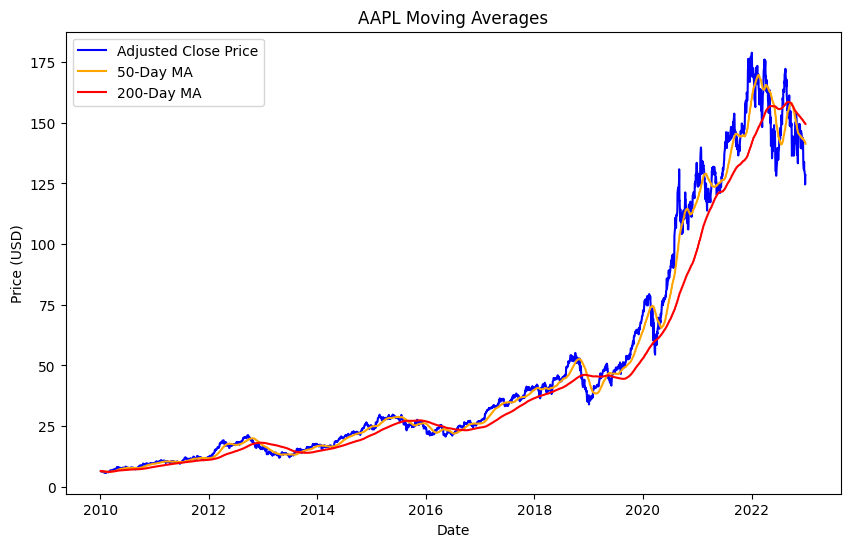

In [ ]:
# Calculate 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50,min_periods=0).mean()
data['MA200'] = data['Close'].rolling(window=200,min_periods=0).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Adjusted Close Price', color='blue')
plt.plot(data['MA50'], label='50-Day MA', color='orange')
plt.plot(data['MA200'], label='200-Day MA', color='red')
plt.title(f"{ticker} Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Mean Squared Error: 45.912032177383715


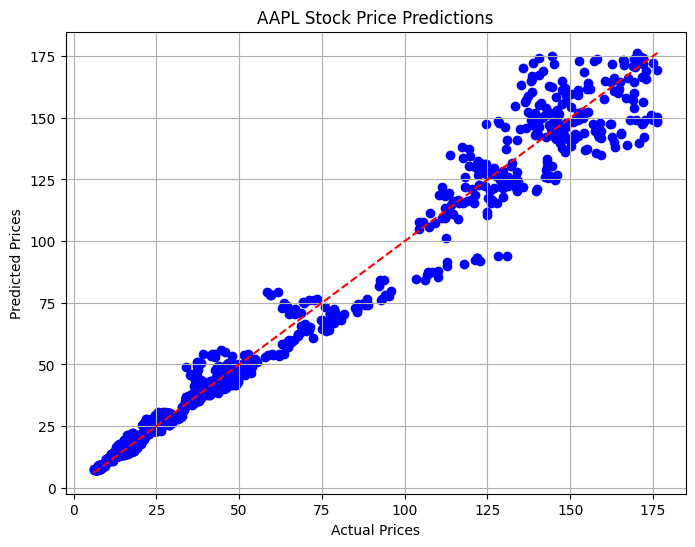

array([ 0.75185884,  0.29366648, -0.04393314])

In [ ]:
# Prepare features (X) and target (y)
data['Prediction'] = data['Close'].shift(-30)  # Predict 30 days into the future
data.dropna(inplace=True)

X = data[['Close', 'MA50', 'MA200']]
y = data['Prediction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f"{ticker} Stock Price Predictions")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()

model.coef_

Modelo de juguete probando el funcionamiento de LinearRegression

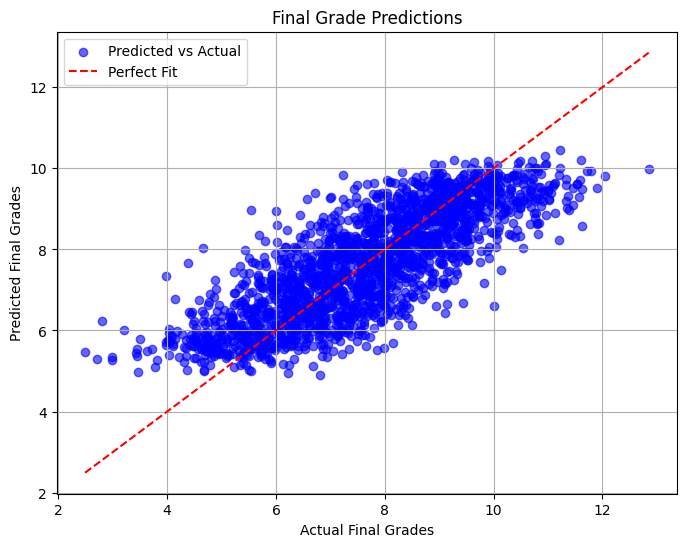

(1.007370433065417,
 array([0.39265585, 0.500571  , 0.00899194]),
 0.13580764530213152)

In [ ]:
# Modelo de juguete
# Set random seed for reproducibility
#np.random.seed(42)

# Datos sinteticos
num_students = 10000

homework_scores = np.random.uniform(5, 10, num_students)  # Puntaje 5 and 10
test_scores = homework_scores + np.random.normal(0, 0.5, num_students)  # ruido
attendance = np.random.uniform(70, 100, num_students)  # Attendance 70% y 100%

# Modelo propuesto para las notas de los alumnos
final_grades = 0.4 * homework_scores + 0.5 * test_scores + 0.1 * (attendance / 10) + np.random.normal(0, 1, num_students)

X = np.column_stack((homework_scores, test_scores, attendance))
y = final_grades

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
coefficients = model.coef_
intercept = model.intercept_

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Final Grades")
plt.ylabel("Predicted Final Grades")
plt.title("Final Grade Predictions")
plt.legend()
plt.grid(True)
plt.show()

mse, coefficients, intercept


# Segundo acercamiento
Realizemos lo de antes para un gran conjunto de empresas.


In [4]:
stocks = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN"]
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "NVDA", "INTC", "ADBE", "CRM", "TSLA"]

data = {}

for stock in stocks:
    data[stock] = yf.download(stock, start="2000-01-01", end="2025-01-01")
    data[stock]['Daily Return'] = data[stock]['Close'].pct_change()

    # Use data[stock] instead of df
    data[stock].reset_index(inplace=True)
    data[stock].columns = data[stock].columns.droplevel(1)  # If you have a MultiIndex
    data[stock].columns.name = None
    data[stock].set_index('Date', inplace=True)
    data[stock].index = pd.to_datetime(data[stock].index)
print(f'\n{data["GOOGL"].head()}')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


               Close      High       Low      Open     Volume  Daily Return
Date                                                                       
2004-08-19  2.501941  2.594698  2.392727  2.493464  893181924           NaN
2004-08-20  2.700670  2.719870  2.505931  2.518648  456686856      0.079430
2004-08-23  2.727849  2.829582  2.719122  2.761511  365122512      0.010064
2004-08-24  2.614895  2.782705  2.582480  2.773729  304946748     -0.041408
2004-08-25  2.643072  2.692941  2.590210  2.617140  183772044      0.010776


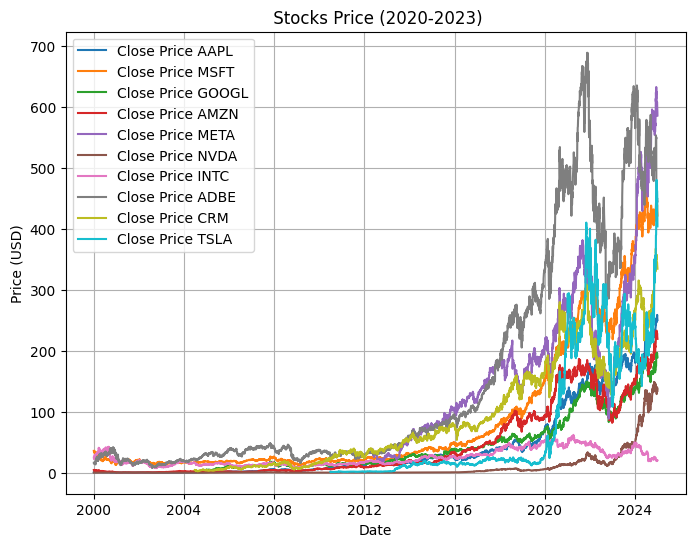

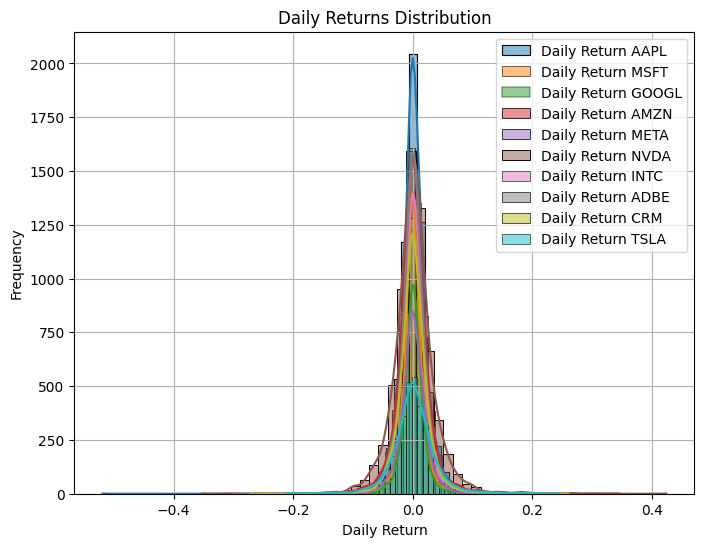

In [11]:
plt.figure(figsize=(8, 6))

for i in stocks:
    plt.plot(data[i]['Close'], label=f'Close Price {i}')

plt.title(f" Stocks Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

# distribution of daily returns
plt.figure(figsize=(8, 6))
for i in stocks:
    sns.histplot(data[i]['Daily Return'].dropna(), bins=50, kde=True, label=f'Daily Return {i}')
plt.title(f"Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

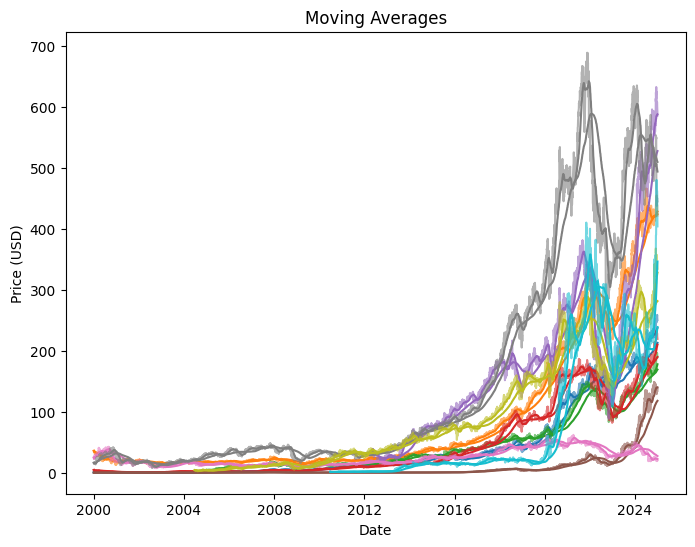

In [44]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for stock in stocks:
    data[stock]['MA50'] = data[stock]['Close'].rolling(window=50,min_periods=0).mean()
    data[stock]['MA200'] = data[stock]['Close'].rolling(window=200,min_periods=0).mean()

# Plot averages
plt.figure(figsize=(8, 6))

for i, stock in enumerate(stocks):
    color = default_colors[i % len(default_colors)]
    plt.plot(data[stock]['Close'], alpha=0.6, label='Adjusted Close Price', color=color)
    plt.plot(data[stock]['MA50'], label='50-Day MA', color=color)
    plt.plot(data[stock]['MA200'], label='200-Day MA', color=color)

plt.title(f"Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [13]:
print(data['AAPL'].head())
print(data['AAPL'].columns)
print(data['AAPL'].index.name)

               Close      High       Low      Open     Volume  Daily Return  \
Date                                                                          
2000-01-03  0.842151  0.846382  0.765036  0.789017  535796800           NaN   
2000-01-04  0.771149  0.832276  0.761274  0.814408  512377600     -0.084310   
2000-01-05  0.782433  0.831806  0.774910  0.780552  778321600      0.014633   
2000-01-06  0.714723  0.805004  0.714723  0.798421  767972800     -0.086538   
2000-01-07  0.748578  0.759864  0.718485  0.726008  460734400      0.047369   

                MA50     MA200  
Date                            
2000-01-03  0.842151  0.842151  
2000-01-04  0.806650  0.806650  
2000-01-05  0.798578  0.798578  
2000-01-06  0.777614  0.777614  
2000-01-07  0.771807  0.771807  
Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Daily Return', 'MA50',
       'MA200'],
      dtype='object')
Date


In [14]:
def compile_data(tickers,dfs):

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = dfs[ticker].copy()
        df.reset_index(inplace=True)
        df.set_index("Date", inplace=True)

        df.rename(columns={'Daily Return': ticker}, inplace=True)

        # Remove unnecessary columns
        df.drop(['Close','Open', 'High', 'Low', 'Volume','MA50','MA200'], axis=1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(f"Processed {count} tickers...")

    print(main_df.head())
    main_df.reset_index(inplace=True)
    main_df.to_csv('sp500_joined_closes.csv')

compile_data(stocks,data)


Processed 0 tickers...
                AAPL      MSFT  GOOGL      AMZN  META      NVDA      INTC  \
Date                                                                        
2000-01-03       NaN       NaN    NaN       NaN   NaN       NaN       NaN   
2000-01-04 -0.084310 -0.033780    NaN -0.083217   NaN -0.026701 -0.046695   
2000-01-05  0.014633  0.010544    NaN -0.148741   NaN -0.032922  0.008289   
2000-01-06 -0.086538 -0.033498    NaN -0.060036   NaN -0.065253 -0.058296   
2000-01-07  0.047369  0.013068    NaN  0.061010   NaN  0.016700  0.041270   

                ADBE  CRM  TSLA  
Date                             
2000-01-03       NaN  NaN   NaN  
2000-01-04 -0.083889  NaN   NaN  
2000-01-05  0.019771  NaN   NaN  
2000-01-06  0.008163  NaN   NaN  
2000-01-07  0.048583  NaN   NaN  


            Unnamed: 0      AAPL      MSFT     GOOGL      AMZN      META  \
Unnamed: 0    1.000000  0.001635  0.026859 -0.012815  0.005324  0.002956   
AAPL          0.001635  1.000000  0.480835  0.513491  0.371040  0.425606   
MSFT          0.026859  0.480835  1.000000  0.561758  0.442489  0.472754   
GOOGL        -0.012815  0.513491  0.561758  1.000000  0.513095  0.536525   
AMZN          0.005324  0.371040  0.442489  0.513095  1.000000  0.505037   

                NVDA      INTC      ADBE       CRM      TSLA  
Unnamed: 0  0.008299 -0.002443 -0.003759 -0.010748  0.002646  
AAPL        0.421363  0.481328  0.438786  0.411554  0.354982  
MSFT        0.483378  0.576308  0.553005  0.482219  0.347152  
GOOGL       0.447087  0.425548  0.514762  0.430185  0.328558  
AMZN        0.356237  0.383812  0.423640  0.449203  0.349626  


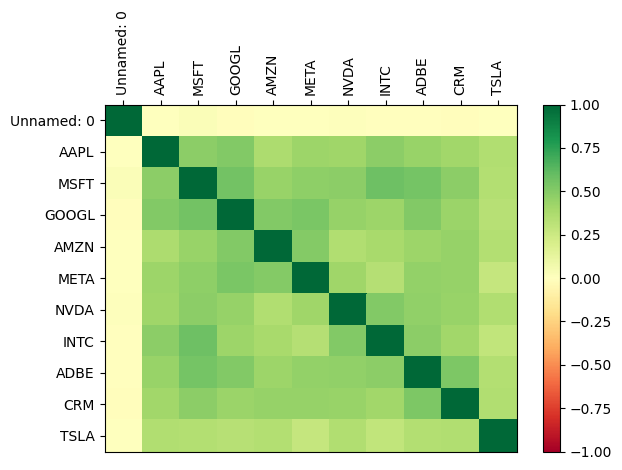

In [15]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


visualize_data()

In [42]:
import plotly.express as px

def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
    df_corr = df.corr()  # Compute correlation matrix

    fig = px.imshow(df_corr,
                    color_continuous_scale='RdYlGn',
                    zmin=-1, zmax=1,
                    labels=dict(x="Stocks", y="Stocks", color="Correlation"),
                    title="S&P 500 Stock Correlation Heatmap")

    fig.update_layout(
        xaxis=dict(tickmode='array', tickvals=list(range(len(df_corr.columns))), ticktext=df_corr.columns, side="top"),
        yaxis=dict(tickmode='array', tickvals=list(range(len(df_corr.index))), ticktext=df_corr.index),
        width=500, height=450
    )

    fig.show()

visualize_data()

# Regresion lineal para muchos tickets.

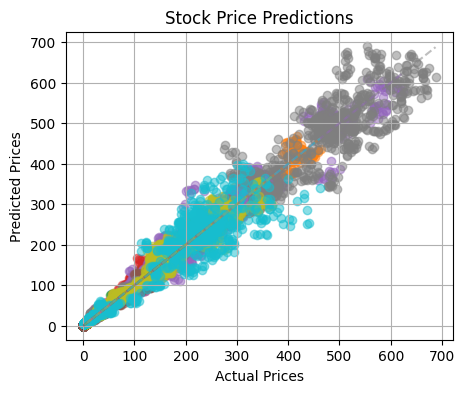

In [40]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

results = {}

plt.figure(figsize=(5, 4))


for j, i in enumerate(stocks):
    color = default_colors[j % len(default_colors)]

    stock_data = data[i].copy()

    stock_data['Prediction'] = stock_data['Close'].shift(-30)
    stock_data.dropna(inplace=True)

    X = stock_data[['Close', 'MA50', 'MA200']]
    y = stock_data['Prediction']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)

    results[i] = {
        "MSE": mse,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_
    }


    plt.scatter(y_test, predictions,alpha = 0.5, color=color, label = f"{i}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],alpha = 0.5, color=color, linestyle='--')

plt.title(f"Stock Price Predictions")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()


AAPL - Mean Squared Error: 40.845050621004184
MSFT - Mean Squared Error: 94.95057850415958
GOOGL - Mean Squared Error: 28.441194663032174
AMZN - Mean Squared Error: 51.76447113964193
META - Mean Squared Error: 592.9148089615906
NVDA - Mean Squared Error: 14.870231183281412
INTC - Mean Squared Error: 10.169028826265112
ADBE - Mean Squared Error: 699.2837907717429
CRM - Mean Squared Error: 190.6595721078256
TSLA - Mean Squared Error: 848.623945496375


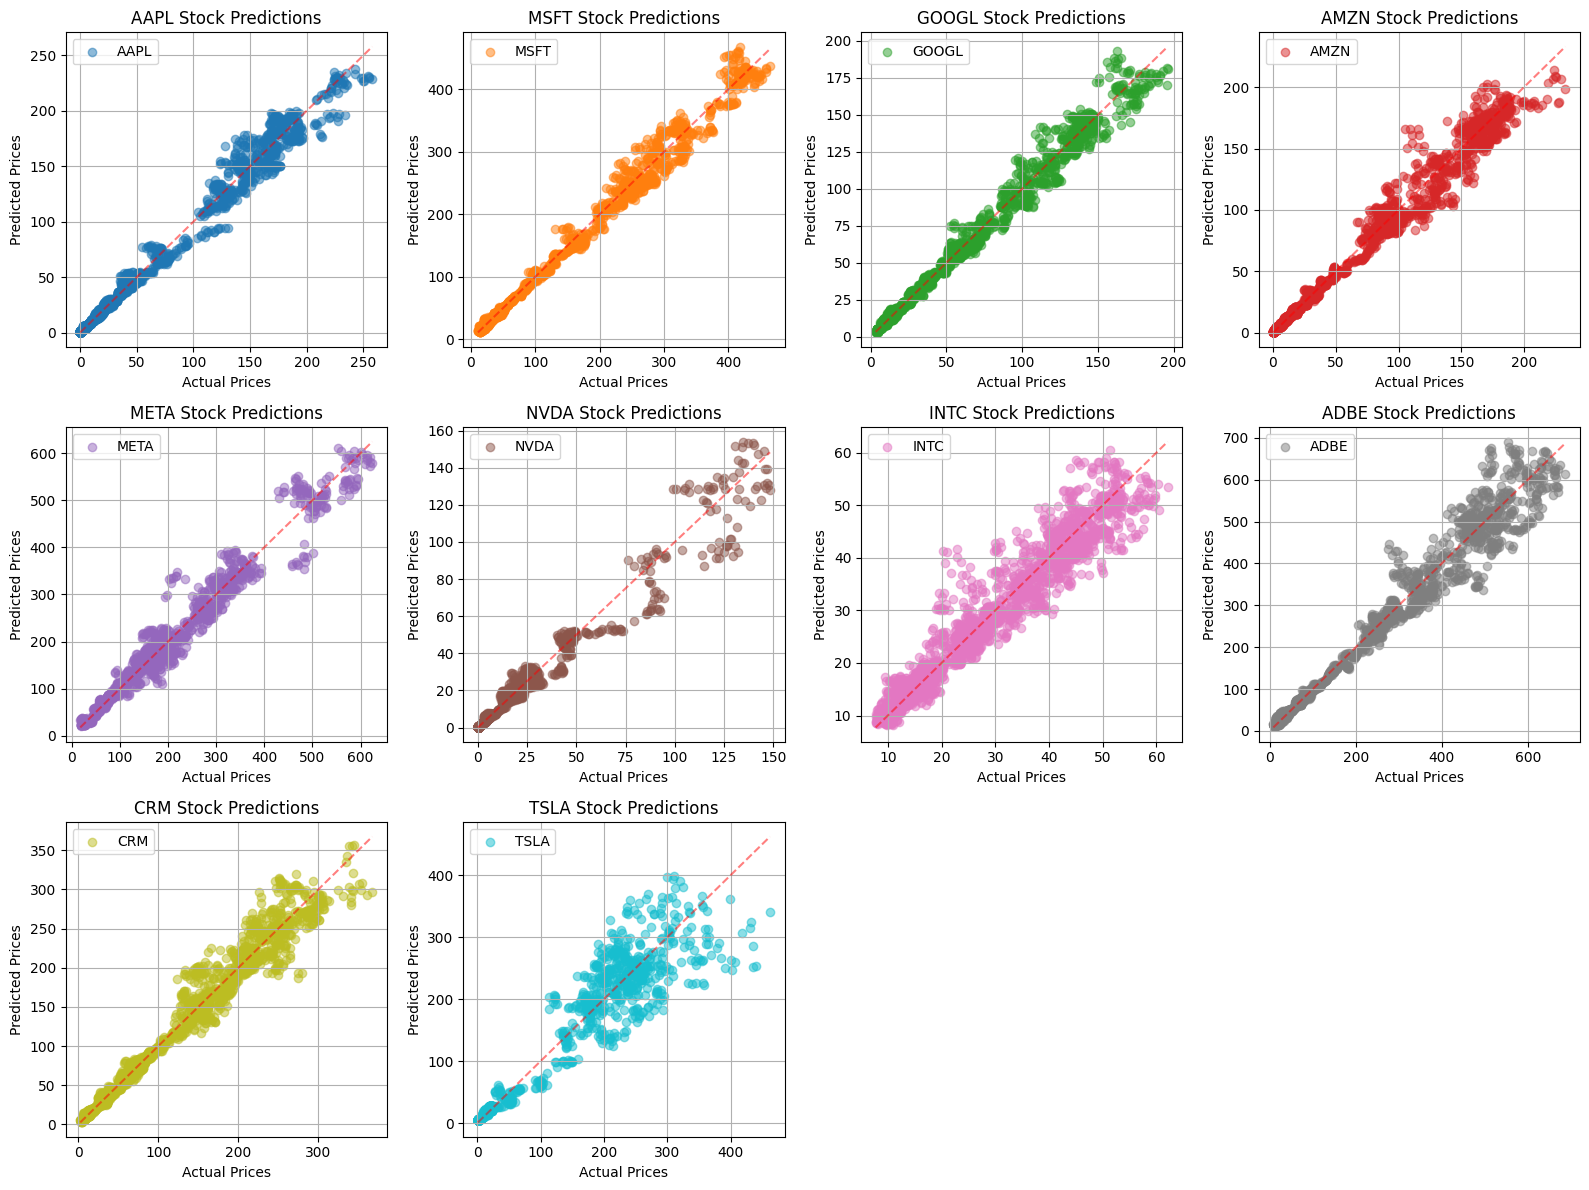


Stock: AAPL
MSE: 40.845050621004184
Coefficients: [0.85459332 0.03435573 0.14315356]
Intercept: 0.3182565309141765

Stock: TSLA
MSE: 848.623945496375
Coefficients: [0.883169   0.08204331 0.04156002]
Intercept: 3.5202327601519983


In [41]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

results = {}  # Diccionario para guardar MSE y coeficientes

num_stocks = len(stocks)
num_cols = 4
num_rows = (num_stocks + num_cols - 1) // num_cols  # filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
axes = axes.flatten()

for j, stock in enumerate(stocks):
    color = default_colors[j % len(default_colors)]
    stock_data = data[stock].copy()

    stock_data['Prediction'] = stock_data['Close'].shift(-30)  # Predecir 30 días en el futuro
    stock_data.dropna(inplace=True)  # Eliminar NaN

    X = stock_data[['Close', 'MA50', 'MA200']]
    y = stock_data['Prediction']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f"{stock} - Mean Squared Error: {mse}")

    results[stock] = {
        "MSE": mse,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_
    }

    ax = axes[j]
    ax.scatter(y_test, predictions, alpha=0.5, color=color, label=f"{stock}")
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], alpha=0.5, color="red", linestyle='--')
    ax.set_title(f"{stock} Stock Predictions")
    ax.set_xlabel("Actual Prices")
    ax.set_ylabel("Predicted Prices")
    ax.legend()
    ax.grid()

for j in range(num_stocks, num_rows * num_cols):
    fig.delaxes(axes[j]) # Delete unused subplots

plt.tight_layout()
plt.show()

for i in [0,-1]:
    for stock, info in [list(results.items())[i]]:
        print(f"\nStock: {stock}")
        print(f"MSE: {info['MSE']}")
        print(f"Coefficients: {info['Coefficients']}")
        print(f"Intercept: {info['Intercept']}")
